# Curso de Series de Tiempo Maestría en Estadística Aplicada

Diego Ramírez

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("darkgrid")

# Datos transversales

Se analizan los datos de gasto militar respecto del PIB en el año 2010 siendo este un ejemplo de datos transversal

In [4]:
data = pd.read_csv('datasets/WDIData.csv')
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')


In [5]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (401016, 62)


In [6]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


In [7]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

In [8]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 62)
Shape of military_exp: (264, 62)


Se observa que la base de datos contiene información de varios años, por lo que se filtra para el año 2010. Se crearon dos objetos que son la deuda publica y el gasto miilitar ambos como % del PIB

In [9]:
central_govt_debt['2010'].describe()

count     94.000000
mean      53.048479
std       29.790674
min        0.519665
25%       28.357797
50%       49.540245
75%       75.259012
max      161.596402
Name: 2010, dtype: float64

In [72]:
(central_govt_debt['2010']> 100).sum()

6

In [73]:
(central_govt_debt['2010']< 1).sum()

1

La deuda pública muestra diferencias bastante interesantes entre los países observados, sin embargo, se evidencia que la misma en promedio está en el 53% del PIB y en 6 países alcanza a superar el 100% del PIB y solamente uno está por debajo del 1% de deuda.

In [10]:
military_exp['2010'].describe()

count    192.000000
mean       1.988556
std        1.354856
min        0.000000
25%        1.190287
50%        1.613407
75%        2.624711
max        8.565679
Name: 2010, dtype: float64

In [76]:
print(military_exp['2010'].mean() - 1.96*military_exp['2010'].std())
print(military_exp['2010'].mean() + 1.96*military_exp['2010'].std())

-0.6669614928849208
4.644073434819777


In [80]:
(military_exp['2010'] > military_exp['2010'].mean()).sum() / len(military_exp['2010']) * 100

24.62121212121212

En contraste, el gasto militar representa un porcentaje menor del PIB respecto de la deuda pública, el gasto militar en promedio se encuentra en entre 0% y el 4.64% del PIB (promedio 1.98(1.35)).
65 países se encuentran por encima del promedio en gasto militar siendo el 24.62% de todos los países estudiados para el año 2010

In [11]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [12]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [13]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [14]:
data_to_plot.shape

(202, 2)

In [15]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [16]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [17]:
data_to_plot.shape

(84, 2)

In [18]:
military_exp_np = np.array(data_to_plot.military_exp)

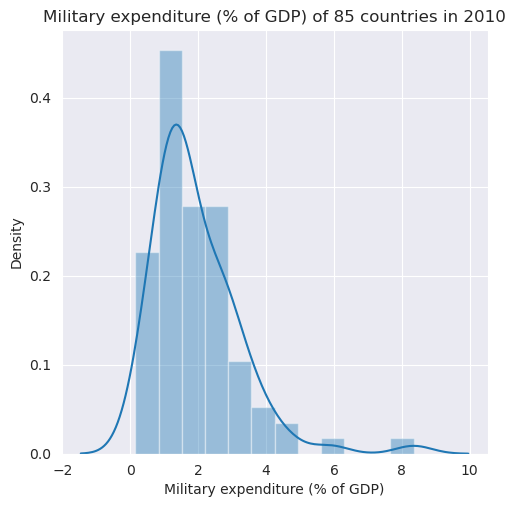

In [81]:
#military
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(military_exp_np, norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010');
plt.xlabel("Military expenditure (% of GDP)");

El histograma anterior confirma lo observado a nivel descriptivo, la mayor distribución del gasto militar se encuentra por debajo de la media de gasto y son pocos los que se encuentran por encima de esta.

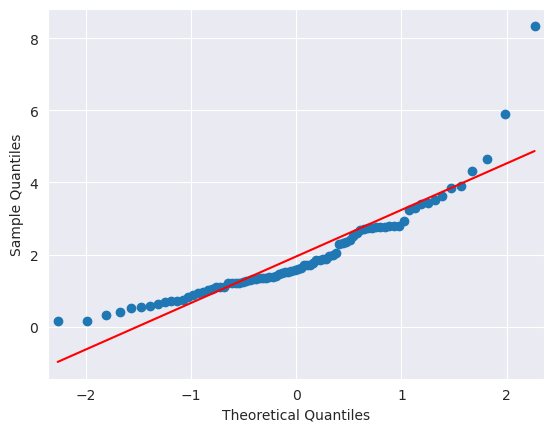

In [20]:
from statsmodels.graphics.gofplots import qqplot

qqplot(military_exp_np, line='s');

Así mismo, el qqplot anterior muestra que no existe una distribución simétrica, esto, más lo observado en el histograma, dan muestra que el gasto militar no se distribuye normalmente.

In [21]:
from scipy.stats import shapiro

stat, p = shapiro(military_exp_np)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Statistics=0.857, p=0.000
Sample does not look Normal (reject H0)


In [22]:
from scipy.stats import normaltest, kurtosis, skew

stat, p = normaltest(military_exp_np)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

print('Kurtosis=%.3f'%kurtosis(military_exp_np))
print('Skew=%.3f'%skew(military_exp_np))

Statistics=49.874, p=0.000
Sample does not look Gaussian (reject H0)
Kurtosis=6.122
Skew=1.916


Las pruebas estadísticas anteriores confirman lo observado a nivel gráfico que el gasto militar no muestra un comportamiento simétrico y no se distribuye normalmente.

Si este análisis se repite para la deuda se obtiene lo siguiente

In [83]:
debt_exp_np = np.array(data_to_plot.central_govt_debt)

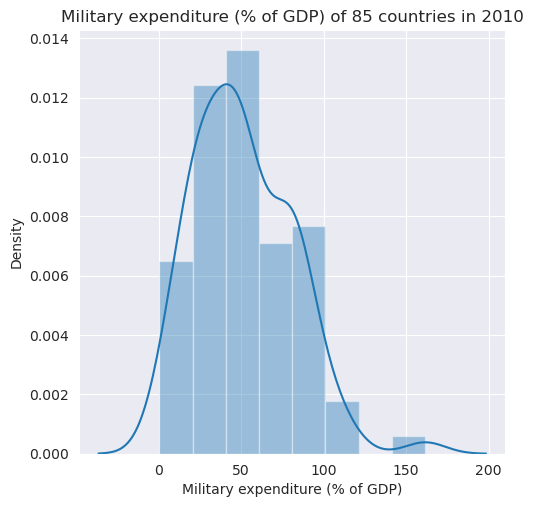

In [84]:
#debt
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(debt_exp_np, norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010');
plt.xlabel("Military expenditure (% of GDP)");

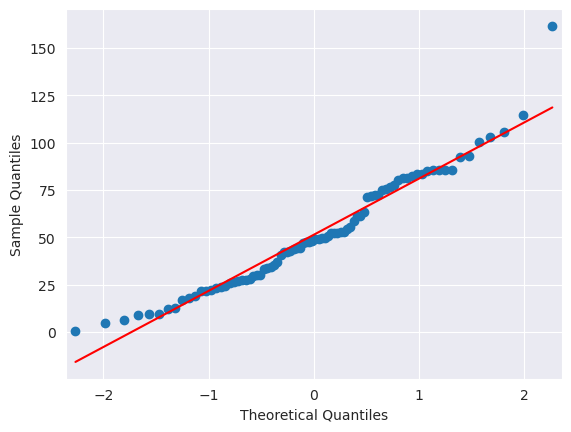

In [85]:
qqplot(debt_exp_np, line='s');

In [86]:
from scipy.stats import normaltest, kurtosis, skew

stat, p = normaltest(debt_exp_np)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

print('Kurtosis=%.3f'%kurtosis(military_exp_np))
print('Skew=%.3f'%skew(military_exp_np))

Statistics=9.363, p=0.009
Sample does not look Gaussian (reject H0)
Kurtosis=6.122
Skew=1.916


In [87]:
from scipy.stats import shapiro

stat, p = shapiro(debt_exp_np)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Statistics=0.957, p=0.007
Sample does not look Normal (reject H0)


In [22]:
from scipy.stats import normaltest, kurtosis, skew

stat, p = normaltest(military_exp_np)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

print('Kurtosis=%.3f'%kurtosis(military_exp_np))
print('Skew=%.3f'%skew(military_exp_np))

Statistics=49.874, p=0.000
Sample does not look Gaussian (reject H0)
Kurtosis=6.122
Skew=1.916


Se observa en ambos casos que no existe una distribución simétrica o con tendencia normal para la deuda pública ni para el gasto militar.

In [23]:
data_to_plot.head(5)

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


Text(0, 0.5, 'Debt of central governments')

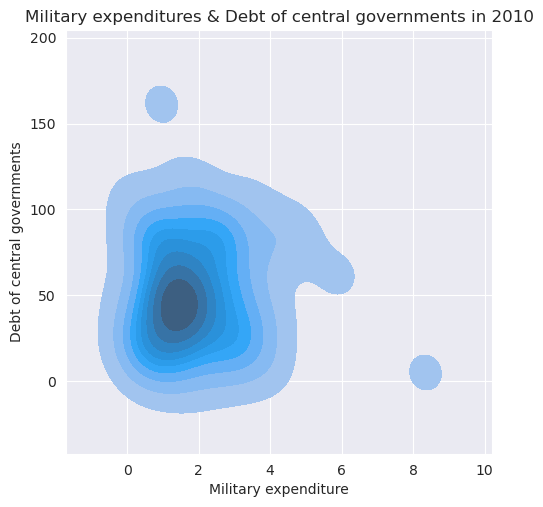

In [24]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot, 
                x = "military_exp", 
                y = "central_govt_debt", 
                fill=True)
g.set_title('Military expenditures & Debt of central governments in 2010')
plt.xlabel("Military expenditure")
plt.ylabel("Debt of central governments")

El gráfico anterior nos muestra que los países con gasto militar cercano al promedio, tienden a tener un porcentaje de deuda pública entre el 45% y el 55% del PIB, son interesantes los dos casos atípicos donde el gasto militar es el más alto y al mismo timepo la deuda es baja cercana al cero y aquel que el gasto militar está alrededor del promedio y la deuda es la más alta.

# Datos de series temporales

Ahora se analiza el comportamiento en el periodo 2001 - 2010 de la deuda pública y el gasto militar en EEUU, este análisis corresponde a un estudio de datos de series temporales.

In [25]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

In [26]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
data_us.head()

,Federal Military Expenditure,Debt of Federal Government
1960,8.35266,NaN
1961,8.487129,NaN
1962,8.656586,NaN
1963,8.189007,NaN
1964,7.467629,NaN


In [27]:
data_us.isna().sum()

Federal Military Expenditure     0
Debt of Federal Government      29
dtype: int64

Como se puede observar se presenta una gran candidad de datos faltantes en la distribución, estos se pueden imputar con las siguientes técnicas, sin embargo, para el objetivo final de este ejemplo no es necesario aplicarlas.

In [28]:
data_us['backward_fill'] = data_us['Debt of Federal Government'].bfill()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill
1960,8.35266,NaN,39.016963
1961,8.487129,NaN,39.016963
1962,8.656586,NaN,39.016963
1963,8.189007,NaN,39.016963
1964,7.467629,NaN,39.016963


Promedio

In [29]:
data_us['mean_fill'] = data_us['Debt of Federal Government'].mean()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill
1960,8.35266,NaN,39.016963,51.155537
1961,8.487129,NaN,39.016963,51.155537
1962,8.656586,NaN,39.016963,51.155537
1963,8.189007,NaN,39.016963,51.155537
1964,7.467629,NaN,39.016963,51.155537


Mediana

In [30]:
data_us['median_fill'] = data_us['Debt of Federal Government'].median()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill
1960,8.35266,NaN,39.016963,51.155537,47.659404
1961,8.487129,NaN,39.016963,51.155537,47.659404
1962,8.656586,NaN,39.016963,51.155537,47.659404
1963,8.189007,NaN,39.016963,51.155537,47.659404
1964,7.467629,NaN,39.016963,51.155537,47.659404


Interpolación

In [31]:
data_us['quadratic_fill'] = data_us['Debt of Federal Government'].interpolate(option='quadratic')
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill,quadratic_fill
1960,8.35266,NaN,39.016963,51.155537,47.659404,NaN
1961,8.487129,NaN,39.016963,51.155537,47.659404,NaN
1962,8.656586,NaN,39.016963,51.155537,47.659404,NaN
1963,8.189007,NaN,39.016963,51.155537,47.659404,NaN
1964,7.467629,NaN,39.016963,51.155537,47.659404,NaN


Cómo se dijo anteriormente estos datos faltantes no afectan nuestro objeto por lo cuál podemos eliminarlos

In [32]:
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (22, 6)


In [33]:
data_us.head(10)

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill,quadratic_fill
1989,5.374717,39.016963,39.016963,51.155537,47.659404,39.016963
1990,5.120252,40.821367,40.821367,51.155537,47.659404,40.821367
1991,4.539845,43.948026,43.948026,51.155537,47.659404,43.948026
1992,4.666265,45.916542,45.916542,51.155537,47.659404,45.916542
1993,4.326925,48.104749,48.104749,51.155537,47.659404,48.104749
1994,3.941287,47.21406,47.214060,51.155537,47.659404,47.21406
1995,3.638489,47.059783,47.059783,51.155537,47.659404,47.059783
1996,3.350744,46.585511,46.585511,51.155537,47.659404,46.585511
1997,3.209903,43.958801,43.958801,51.155537,47.659404,43.958801
1998,3.017636,41.009914,41.009914,51.155537,47.659404,41.009914


A continuación se gráfica la serie temporal de la deuda y el gasto militar de EEUU entre 2001 - 2010

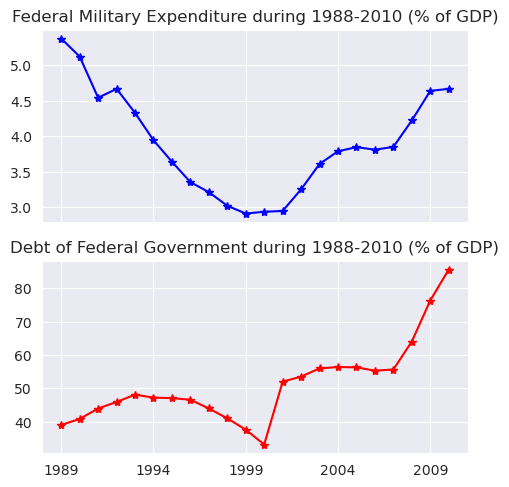

In [34]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1]);

Se observa el impacto de la guerra en Irak y Afganistán tanto en el gasto militar como en la deuda pública de EEUU. Hasta el año 2000 el gasto militar venía en descenso hasta el atentado a las torres gemelas lo que muestra como en 2001 - 2002 el gasto mlitar muestra una clara tendencia al alza igual que la deuda que en ese par de años dio un salto enorme superando el pico anterior del año 1993.

# Datos de panel

El siguiente es un ejemplo de datos longuitudinales, misma base de datos pero ahora se analizarán 4 países (China, EEUU, India y Gran Bretaña) en el periodo 1960-2010

In [35]:
chn = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='CHN'), :].drop(data.columns[range(3)], axis=1) #China
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)
chn.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1989                       2.499185
1990                       2.555996
1991                       2.407892
1992                       2.518629
dtype: object

In [36]:
usa = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='USA'), :].drop(data.columns[range(3)], axis=1) #USA
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)
usa.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                        8.35266
1961                       8.487129
1962                       8.656586
1963                       8.189007
dtype: object

In [37]:
ind = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='IND'), :].drop(data.columns[range(3)], axis=1) #India
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)
ind.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                       1.866015
1961                       1.933365
1962                       2.561202
1963                       3.758057
dtype: object

In [38]:
gbr = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='GBR'), :].drop(data.columns[range(3)], axis=1) #United Kingdom
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)
gbr.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                       6.343041
1961                       6.190022
1962                       6.210394
1963                       6.082126
dtype: object

In [39]:
n_years = chn.shape[0]

Graficando las series temporales de cada país se evidencia los siguiente:

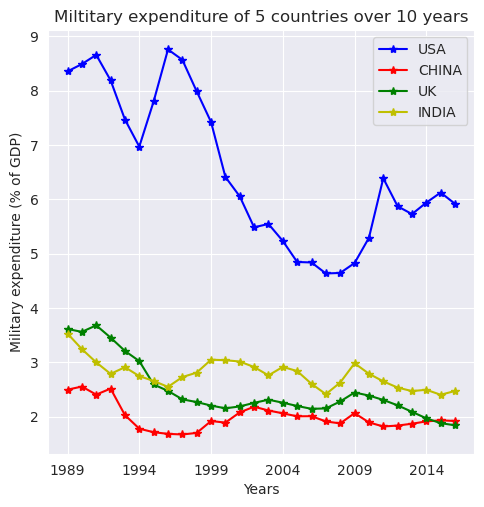

In [40]:
plt.figure(figsize=(5.5, 5.5))
usa[1:n_years].plot(linestyle='-', marker='*', color='b')
chn[1:n_years].plot(linestyle='-', marker='*', color='r')
gbr[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='g')
ind[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years');

Se observa como el gasto militar en EEUU supera al de los otros 3 países de contraste, es interesante como el gasto militar en la India es superior al de rivales directos como China, esto podría explicarse por el conflicto con Pakistán y la constante amenaza china al terriotorio indio, no obstante, y apesar de la expansión militar china India y UK siguen teniendo un gasto mayor que éste.

# Estructuras internas de las series temporales
## Tendencia general

Para este ejemplo se analiza la cancentración de CO2 en el pasar de los años.

In [41]:
data = pd.read_excel('datasets/Monthly_CO2_Concentrations.xlsx', converters={'Year': np.int32, 'Month': np.int32})
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [42]:
data.index = data['Year'].astype(str) + '-' + data['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


In [43]:
data = data.loc[(~pd.isnull(data['CO2'])) & \
                (~pd.isnull(data['Year']))& \
                (~pd.isnull(data['Month']))]

In [44]:
data.sort_values(['Year', 'Month'], inplace=True)

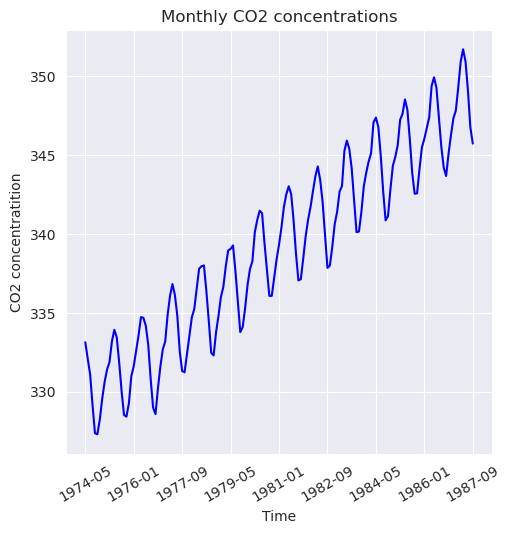

In [45]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

El gráfico anterior muestra una tendencia general al alza con fluctuaciones ascendentes y descendentes en los periodos cortos (locales)

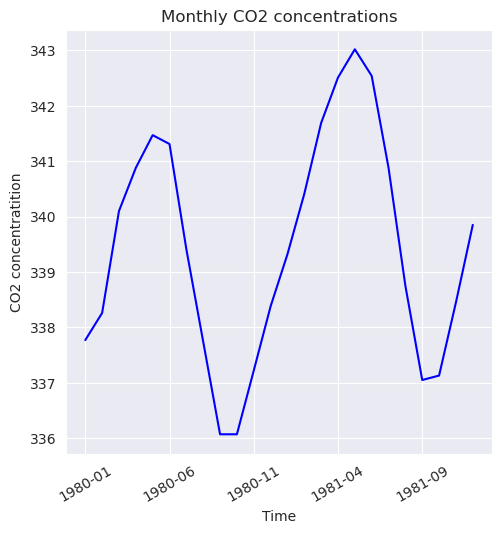

In [46]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [48]:
trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2'])

LinearRegression()

In [49]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


In [50]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

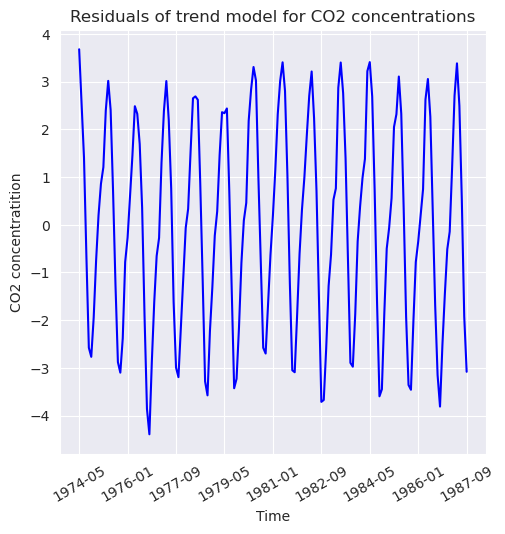

In [51]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

Dado que la tendencia fue ajustada por medio de una regresión lineal, se logra evidenciar que las fluctuaciones muestran claros picos (sobreestiamción en el gráfico de residuos). Esta técnica permite evaluar las tendencias más claramente y con mejor interpretación visual que el primer gráfico de tendencias.

# Estructuras internas de las series temporales
## Estacionalidad 

Se busca identificar patrones estacionales por lo que se añade la etiqueda del trimestre al conjunto de datos 

In [52]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'}
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

In [53]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

In [54]:
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


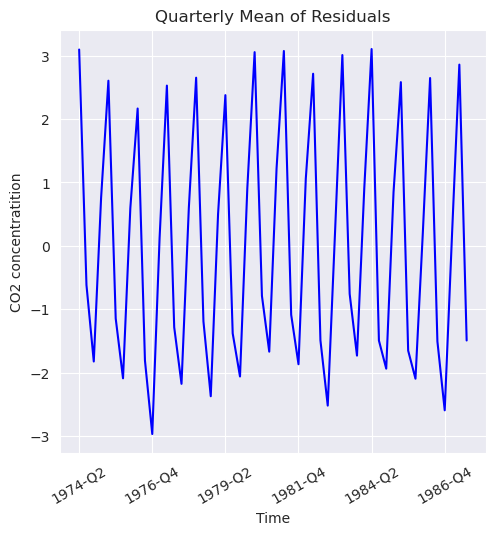

In [55]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

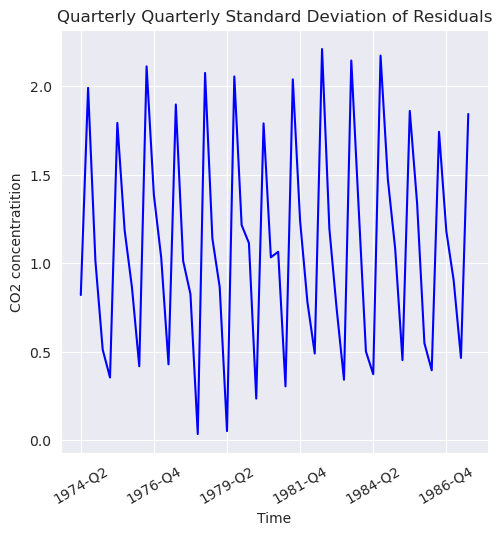

In [56]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

Los gráficos anteriores muestran un comportamiento estacional en los trimestres 2 y 4 (Picos) y 1 y 3 (Valles) por lo que se puede entender como una estructura estacional en la serie temporal analizada desde los promedios y la desviación estándar de los residuos de la regresión lineal múltiple.

# Gráficos de cajas múltiples

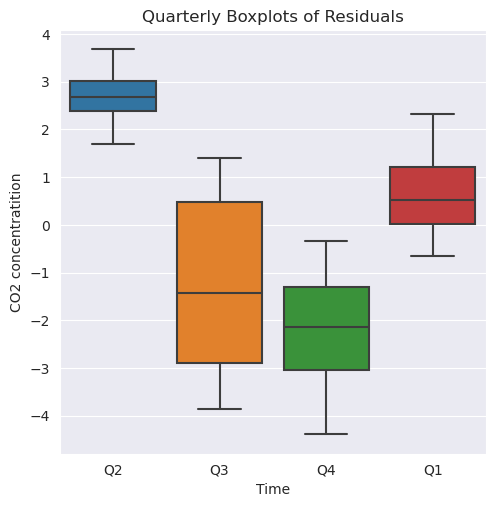

In [88]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition');

Al evaluar el comportamiento desde un gráfico de baja y bigotes se evidencia el mismo comportamiento estacional con la diferencia que se logra encontrar mejor el patrón en la tendencia entre los trimestres del año, es claro que el Q2 evidencia una mayor dispersión respecto de la recta ajustada del modelo de regresión.

# Cambios cíclicos

In [58]:
inflation = pd.read_excel('datasets/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


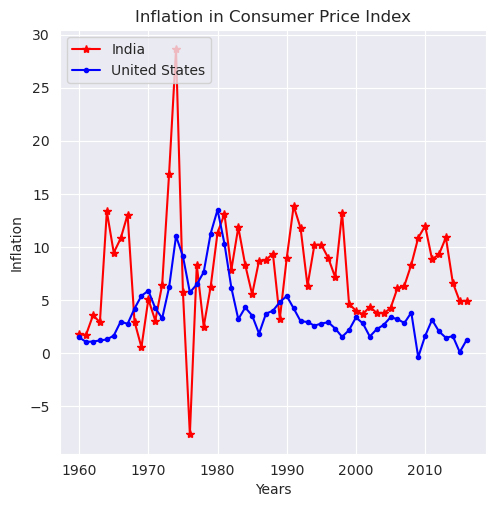

In [59]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years');

La figura anterior muestra un comportamiento ciclico en la inflación en EEUU e India, se logran ver patrones de subidas y bajadas en periodos de aproximadamente 3 años descendiendo y/o ascendiendo respecto del comportamiento del ciclo anterior.
También se logra observar que el comportamiento de la inflación en EEUU tiene fluctuaciones más profundas que en la India donde los cambios entre ciclos son menores en variación del IPC que en EEUU

# Modelos de análisis de series temporales
## Modelos de media cero

In [60]:
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=100)

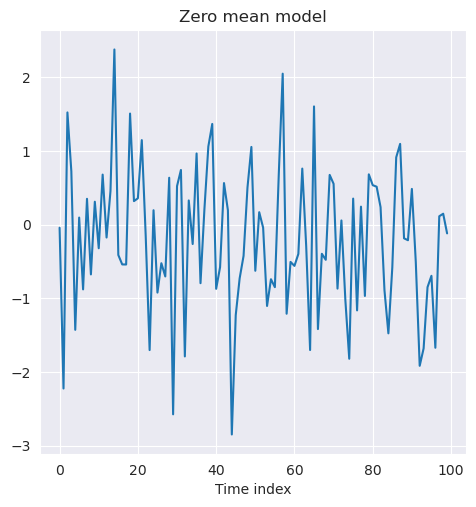

In [61]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index');

# Recorrido aleatorio

In [62]:
random_walk = np.cumsum(zero_mean_series)

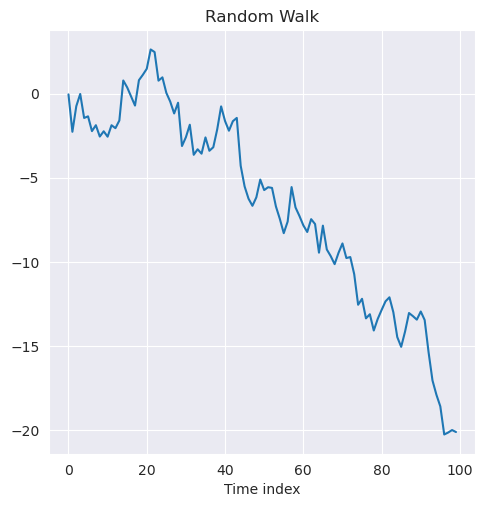

In [63]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index');

In [64]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [65]:
djia_df.index = djia_df['Date']
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-01-04,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


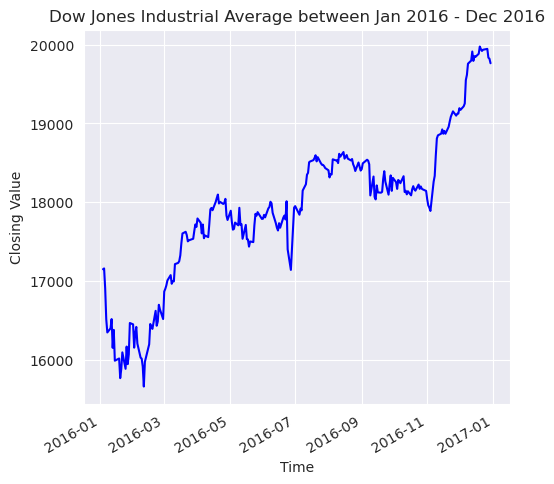

In [66]:
plt.figure(figsize=(5.5, 5.5))
djia_df['Close'].plot(color='b')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value');

El gráfico anterior muestra tendencias a nivel local de cada periodo estacionario (aparente). Los siguientes gráficos permitirán establecer los rezagos para la ACF.

In [67]:
lag = range(0,31)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

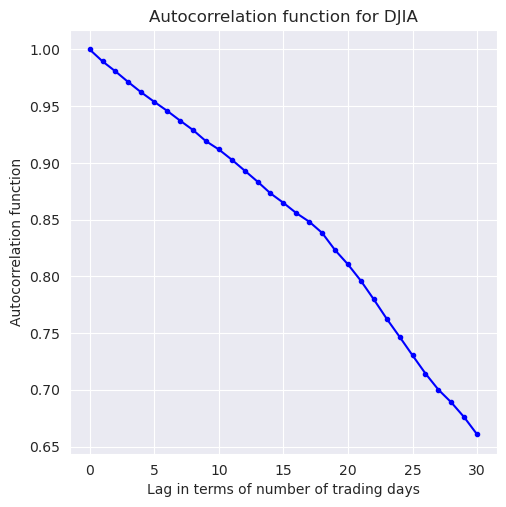

In [68]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(djia_acf, marker='.', color='b')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function');

<Figure size 550x550 with 0 Axes>

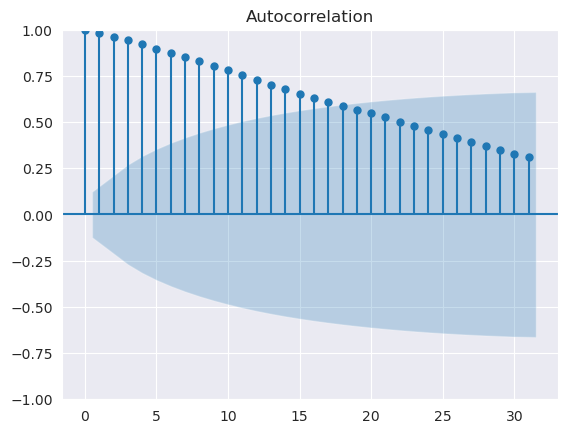

In [69]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(5.5, 5.5))
plot_acf(djia_df['Close'], lags=31);

De los gráficos anteriores, se concluye que en máximo 15 días de rezago o series locales, se observa una buena autocorrelación enl a serie temporal alcanzando .86 en el ACF.

<Figure size 550x550 with 0 Axes>

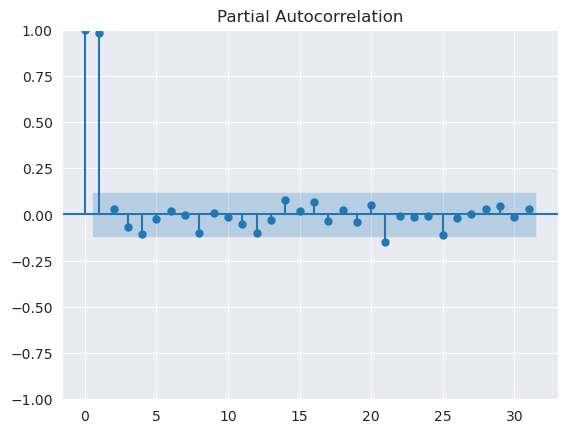

In [70]:
plt.figure(figsize=(5.5, 5.5))
plot_pacf(djia_df['Close'], lags=31);

Sin embargo, la autocorrelación parcial muestra que solo en un rezago existe buena autocorrelación permitiendo establecer que la estacionalidad se puede alcanzar con una sola diferencia entre periodos t para cada $y_t$ 